In [38]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime, timedelta

import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter

In [2]:
PATH = r'D:\WORKS\PolimerSolve\Comsol\tables\1D'


In [9]:
def df_from_comsol(
    name,
    from_name=r'\out.csv',
    temp_name=r'\temp.csv',
):
    with open(PATH + from_name, 'r') as file:
        lines = file.readlines()

    with open(PATH + temp_name, 'w') as file:
        for line in lines[4:]:
            file.write(line)
    df = pd.read_csv(PATH + r'\temp.csv')
    df = df.rename(columns={
        '% light': 'light',
        df.columns[1]: 'target',
    })
    df['name'] = name
    df['time'] = datetime.now().replace(second=0, microsecond=0)
    return df


def add_notes(from_name=r'\out.csv'):
    name = ''
    while True:
        name = input('Name: ')
        if (name != '') and (name != 'q'):
            try:
                old_df = pd.read_csv(PATH + r'\base.csv', index_col=0)
                new_df = pd.concat(
                    [old_df, df_from_comsol(name, from_name=from_name)],
                    ignore_index=True,
                )
            except FileNotFoundError:
                old_df = None
                new_df = df_from_comsol(name, from_name=from_name)
            new_df.to_csv(PATH + r'\base.csv')

            return new_df, old_df
        elif name == 'q':
            break

# Add notes

In [63]:
base, old_df = add_notes()


# Check all notes

In [64]:
df = pd.read_csv(PATH + '/base.csv', index_col=0)
df['name'].unique()

array(['start', 'continue'], dtype=object)

In [65]:
df_show = df
# df_show = df[df['l']<=6E+5]

fig = go.Figure()
fig.update_layout(margin={'r': 0, 'l': 0, 't': 0, 'b': 0})
fig.add_traces(
    go.Scatter(
        x=df_show['light'],
        y=df_show['target'],
        text=df_show['name'],
        mode='markers',
        hovertemplate='k1: %{x:.2}<br>integral: %{y:.2E} <br>%{text}',
        name='',
    ))

Max value = 1.55E-07
Light     = 3.70E-05


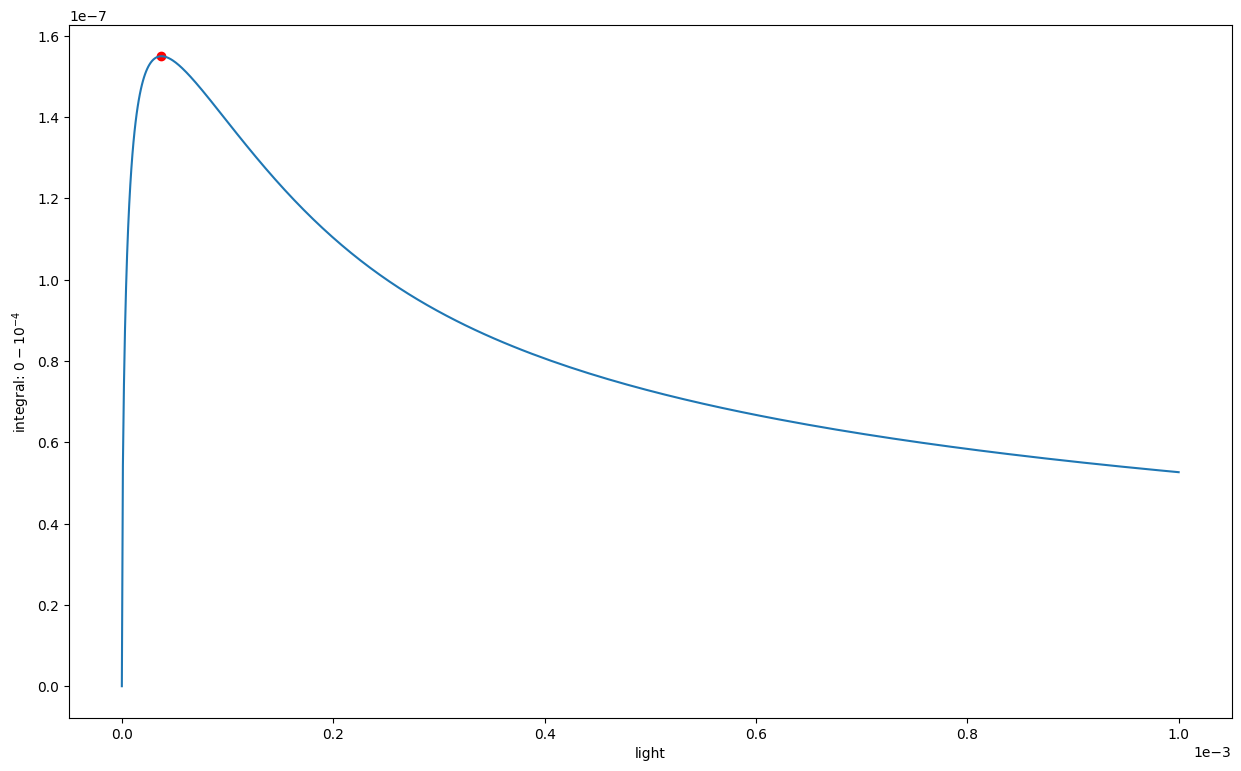

In [66]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(
    df_show['light'],
    df_show['target'],
)
ax.set_xlabel('light')
ax.set_ylabel('integral: $0 - 10^{-4}$')
df_max = df_show[df_show['target'] == df_show['target'].max()]
ax.scatter(
    df_max['light'],
    df_max['target'],
    c='r',
)
max_value = df_max['target'].iloc[0]
max_light = df_max['light'].iloc[0]
print(f'Max value = {max_value:.2E}\nLight     = {max_light:.2E}')
scal_form = ScalarFormatter(1)
scal_form.set_powerlimits((0, 0.1))
ax.xaxis.set_major_formatter(scal_form)

# Check curent file

In [14]:
out_name = input('Write task name: ')
cur_filename = '\\' + out_name + '.csv'
df = pd.read_csv(PATH + r'\cleared' + cur_filename)
df = df.rename(columns={
    '% k1': 'k1',
    df.columns[1]: 'target',
})
fig = go.Figure()
fig.update_layout(margin={'r': 0, 'l': 0, 't': 0, 'b': 0})
fig.add_traces(
    go.Scatter(
        x=df['k1'],
        y=df['target'],
        hovertemplate='k1: %{x}<br>integral: %{y:.2f}',
        name='',
    ))